In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
# put diad fit somewhere
#sys.path.append(r'G:\My Drive\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra')
import DiadFit as pf
from lmfit.models import GaussianModel, VoigtModel, LinearModel, ConstantModel, QuadraticModel, LorentzianModel

## NS9

In [2]:
path1=None
filetype1='Witec_ASCII'
prefix1=True #False if no 01 , True if 01 
file1_MI4='34 NS9_MI4_50X.txt'
file1_MI5='37 NS9_MI5.txt'

In [3]:
## After heating
path2=None
filetype2='Witec_ASCII'
prefix2=True #False if no 01 , True if 01 

file2_MI4='37 NS9_MI4_50X_r1.txt'
file2_MI5='40 NS9_MI5_50X.txt'

In [4]:

data_preheat_MI4_all=pf.get_data(path=path1, filename=file1_MI4, filetype=filetype1)
spec_preheat_MI4=(
    ((data_preheat_MI4_all[:, 0]>1341.5)&(data_preheat_MI4_all[:, 0]<1342))
                  |
     ((data_preheat_MI4_all[:, 0]>1210)&(data_preheat_MI4_all[:, 0]<1220)))            
data_preheat_MI4=data_preheat_MI4_all[~spec_preheat_MI4]
data_preheat_MI4=data_preheat_MI4_all[~spec_preheat_MI4]


data_preheat_MI5_all=pf.get_data(path=path1, filename=file1_MI5, filetype=filetype1)
spec_preheat_MI5=(
    ((data_preheat_MI5_all[:, 0]>1341.5)&(data_preheat_MI5_all[:, 0]<1342))
                  |
     ((data_preheat_MI5_all[:, 0]>1282.5)&(data_preheat_MI5_all[:, 0]<1284)))            
data_preheat_MI5=data_preheat_MI5_all[~spec_preheat_MI5]
data_preheat_MI5=data_preheat_MI5_all[~spec_preheat_MI5]


data_postheat_MI4_all=pf.get_data(path=path2, filename=file2_MI4, filetype=filetype1)
spec_postheat_MI4=(
    ((data_postheat_MI4_all[:, 0]>1341.5)&(data_postheat_MI4_all[:, 0]<1342))
                  |
     ((data_postheat_MI4_all[:, 0]>1210)&(data_postheat_MI4_all[:, 0]<1220)))            
data_postheat_MI4=data_postheat_MI4_all[~spec_postheat_MI4]
data_postheat_MI4=data_postheat_MI4_all[~spec_postheat_MI4]


data_postheat_MI5_all=pf.get_data(path=path2, filename=file2_MI5, filetype=filetype1)
spec_postheat_MI5=(
    ((data_postheat_MI5_all[:, 0]>1341.5)&(data_postheat_MI5_all[:, 0]<1342))
                  |
     ((data_postheat_MI5_all[:, 0]>1282.5)&(data_postheat_MI5_all[:, 0]<1284)))            
data_postheat_MI5=data_postheat_MI5_all[~spec_postheat_MI5]
data_postheat_MI5=data_postheat_MI5_all[~spec_postheat_MI5]

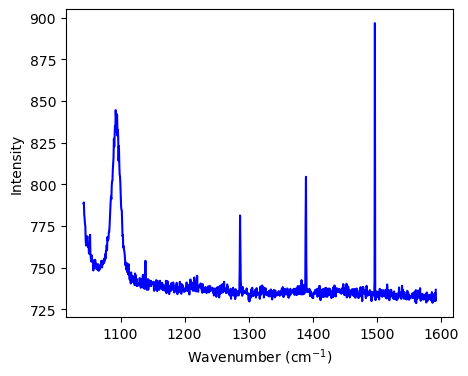

In [5]:
fig, (ax4) = plt.subplots(1, 1, figsize=(5, 4))
#ax3.plot(data_preheat_MI4[:, 0], data_preheat_MI4[:, 1], '-r', lw=1.5)
ax4.plot(data_preheat_MI5[:, 0], data_preheat_MI5[:, 1], '-b', lw=1.5)
ax4.set_xlabel('Wavenumber (cm$^{-1}$)')
#ax3.set_ylabel('Intensity')
ax4.set_ylabel('Intensity')
fig.savefig('AGU.png', dpi=300)
#ax3.set_xlim([1000, 1450])

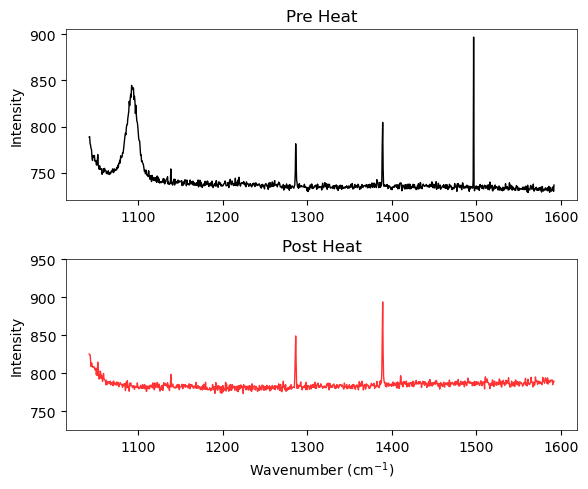

In [6]:
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
fig, ((ax3, ax4)) = plt.subplots(2, 1, figsize=(6, 5))
#ax3.plot(data_preheat_MI4[:, 0], data_preheat_MI4[:, 1], '-k', lw=1)
#ax3b=ax3.twinx()
#ax3.plot(data_postheat_MI4[:, 0], data_postheat_MI4[:, 1], '-r',  lw=1, alpha=0.8)
#ax3b.set_ylim([0, 1500])



ax3.plot(data_preheat_MI5[:, 0], data_preheat_MI5[:, 1], '-k', lw=1)
ax4.plot(data_postheat_MI5[:, 0], data_postheat_MI5[:, 1], '-r',  lw=1, alpha=0.8)

#ax2.plot(data_pheat[:, 0], data_pheat[:, 1], '-b', lw=1)

# ax2.plot([1090, 1090], [750, 2000], ':k', lw=0.5)
# ax1.plot([1090, 1090], [750, 2000], ':k', lw=0.5)
ax4.set_ylim([725, 950])
#ax2.set_xlim([1280, 1300])
ax4.set_ylabel('Intensity')
ax3.set_ylabel('Intensity')
ax3.set_title('Pre Heat')
ax4.set_title('Post Heat')
ax4.set_xlabel('Wavenumber (cm$^{-1}$)')
fig.tight_layout()
fig.savefig('NS9_Heathalf_NoHeat.png', dpi=300)

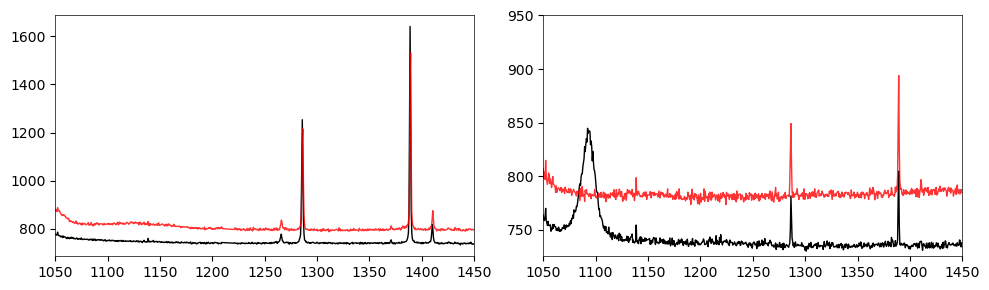

In [7]:
plt.rcParams['patch.linewidth'] = 0.5
plt.rcParams['axes.linewidth'] = 0.5
fig, ((ax3, ax4)) = plt.subplots(1, 2, figsize=(10, 3), sharex=True)
ax3.plot(data_preheat_MI4[:, 0], data_preheat_MI4[:, 1], '-k', lw=1)
#ax3b=ax3.twinx()
ax3.plot(data_postheat_MI4[:, 0], data_postheat_MI4[:, 1], '-r',  lw=1, alpha=0.8)
#ax3b.set_ylim([0, 1500])



ax4.plot(data_preheat_MI5[:, 0], data_preheat_MI5[:, 1], '-k', lw=1)
ax4.plot(data_postheat_MI5[:, 0], data_postheat_MI5[:, 1], '-r',  lw=1, alpha=0.8)

#ax2.plot(data_pheat[:, 0], data_pheat[:, 1], '-b', lw=1)
ax3.set_xlim([1050, 1450])
# ax2.plot([1090, 1090], [750, 2000], ':k', lw=0.5)
# ax1.plot([1090, 1090], [750, 2000], ':k', lw=0.5)
ax4.set_ylim([725, 950])
#ax2.set_xlim([1280, 1300])
fig.tight_layout()
fig.savefig('NS9_Heathalf_NoHeat.png', dpi=300)